In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
gender = encoder.fit_transform(df['gender'])
# Print the encodings
print("Labels:",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels: ['Female' 'Male' 'Other']
Encodings: [0 1 2]


In [7]:
smoking_history = encoder.fit_transform(df['smoking_history'])
# Print the encodings
print("Labels:",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels: ['No Info' 'current' 'ever' 'former' 'never' 'not current']
Encodings: [0 1 2 3 4 5]


In [8]:
# Replace encoded labels with main df
df['gender'] = gender
df['smoking_history'] = smoking_history

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Dataset Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = df['diabetes']
x = df.drop(columns='diabetes')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2,stratify=df['diabetes'])

In [13]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(80000, 8)
(80000,)
(20000, 8)
(20000,)


# Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [17]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841697,1.691070,3.516004,-0.202792,0.432427,0.000472,0.908249,0.170207
1,-0.841697,-1.016460,-0.284414,-0.202792,0.961705,-0.321772,-0.959680,-0.297058
2,-0.841697,-0.261902,-0.284414,-0.202792,-1.155408,-0.205824,1.001645,1.522815
3,-0.841697,-0.306288,-0.284414,-0.202792,-0.626129,-0.585289,0.441267,0.514507
4,-0.841697,-0.528217,-0.284414,-0.202792,-1.155408,-0.707259,-0.492698,-1.182401


In [18]:
x_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.838449,-0.259383,-0.284542,-0.20172,0.440942,-0.709427,0.441469,0.538654
1,-0.838449,-0.481957,-0.284542,-0.20172,0.969839,-0.002474,0.254644,-0.292838
2,1.191695,0.452855,-0.284542,-0.20172,1.498737,-0.624834,-1.426789,-0.928685
3,-0.838449,-0.570987,-0.284542,-0.20172,0.969839,0.488465,-0.492660,0.538654
4,1.191695,0.853489,-0.284542,-0.20172,0.969839,-0.068940,0.254644,-1.173242


# Decision Tree Classifier

In [22]:
# Step-1: Import model
from sklearn.tree import DecisionTreeClassifier

# Step-2: Create an object of the model
dt = DecisionTreeClassifier(random_state=42)

# Step-3: Fit the model with the training set or train model
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Step-4: Get prediction from the model
y_pred_dt = dt.predict(x_test)

In [24]:
# Step-5: Model preformance measure
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.71      0.74      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [25]:
# Train and Test Accuracy
from sklearn.metrics import accuracy_score
print('Test Accuracy ',accuracy_score(y_test,y_pred_dt))
print('Train Accuracy ',accuracy_score(y_train,dt.predict(x_train)))

Test Accuracy  0.952
Train Accuracy  0.9992375


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

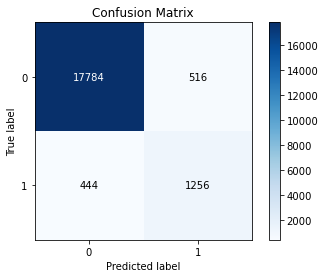

In [26]:
# See Confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)

# Learning Curve

C:\Users\User\anaconda3\lib\site-packages\scikitplot\estimators.py:220: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=figsize)


<Figure size 576x576 with 0 Axes>

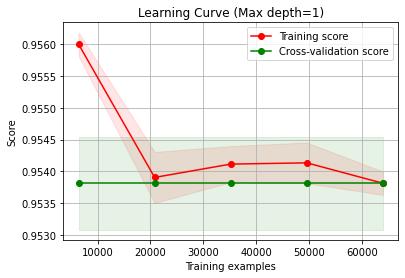

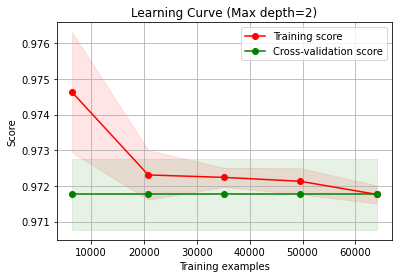

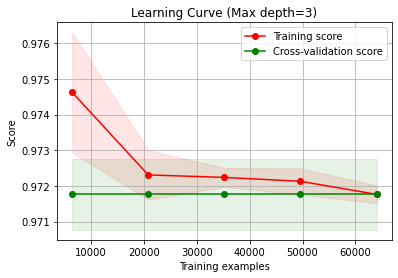

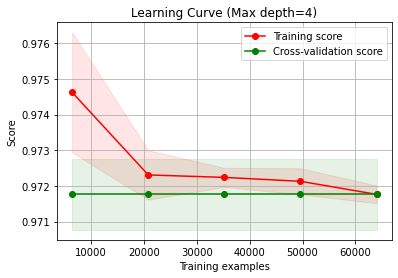

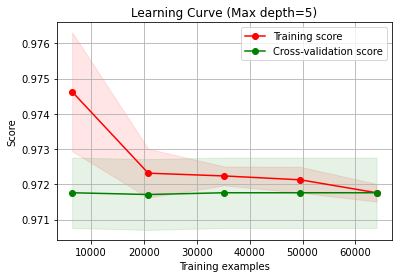

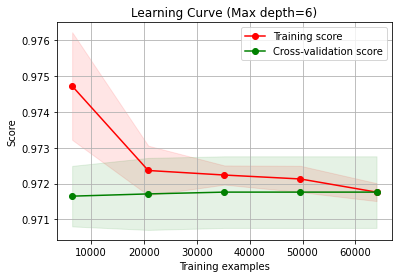

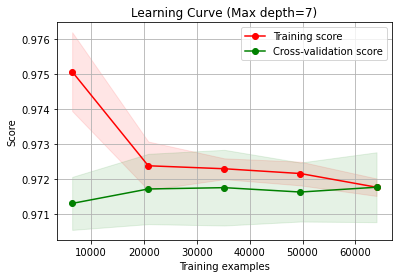

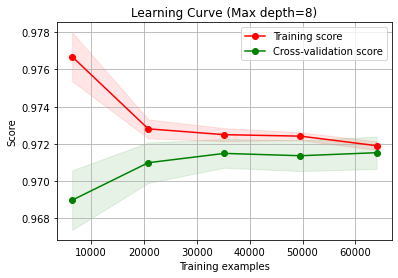

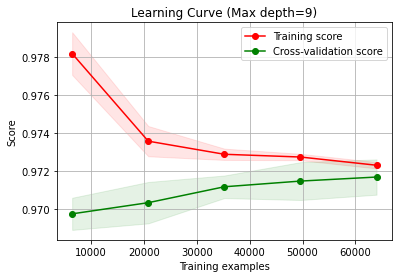

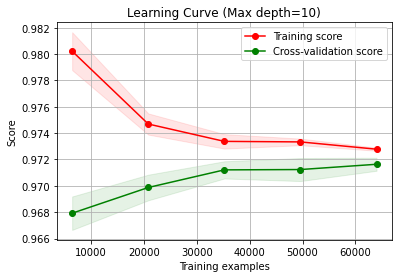

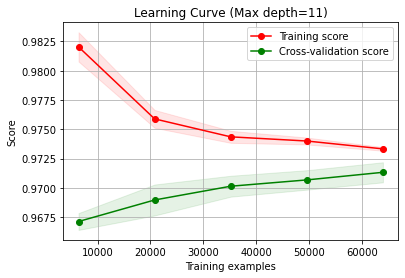

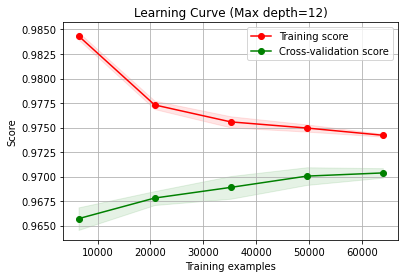

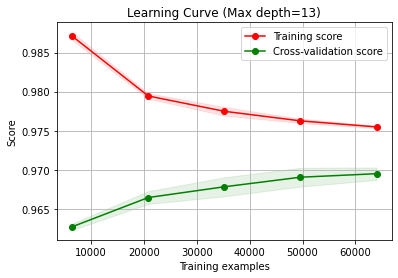

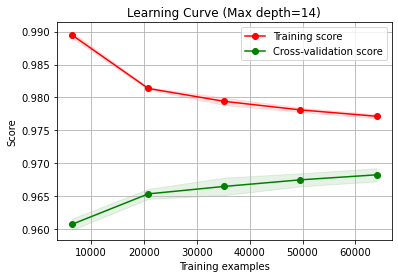

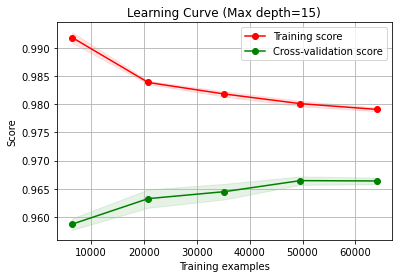

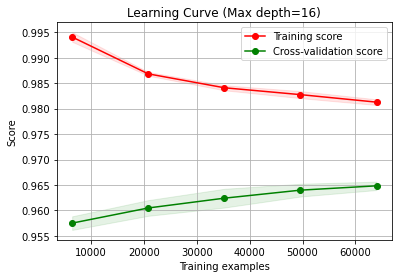

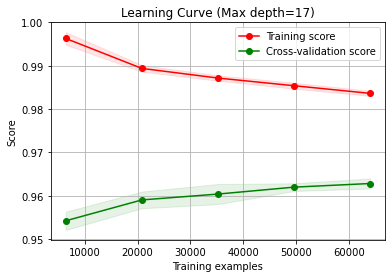

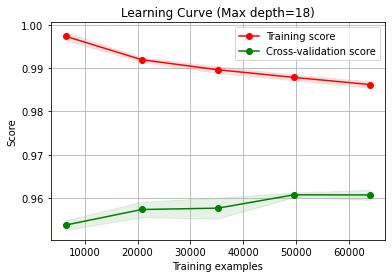

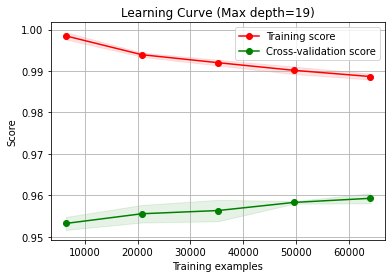

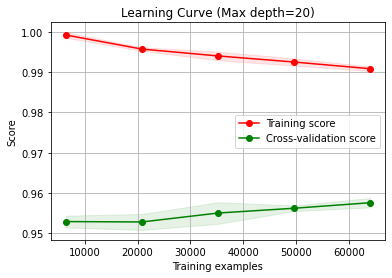

In [28]:
import scikitplot as skplt
plt.figure(figsize=(8,8))

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i,random_state=42)
    text = 'Learning Curve (Max depth='+str(i)+')'
    skplt.estimators.plot_learning_curve(clf,x_train,y_train,title=text)

# END